### Data Preparation Concept

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentence = ["I love my dog", "I love my cat", "You love my cat !",
            "This is amazing", "Hello everyone"]

# Seperating the words in tokens, oov(out of vocvocabulary) words will be <OOV>
t = Tokenizer(num_words=100, oov_token="<OOV>")
t.fit_on_texts(sentence)
# providng index to the words
w = t.word_index
print("word_index =",w)
# replcaing the words in sentences with indexes
seq = t.texts_to_sequences(sentence)
# padding the sequences to make the same length
pad = pad_sequences(seq)

print("sequence =",seq)
print("padding =",pad)

word_index = {'<OOV>': 1, 'love': 2, 'my': 3, 'i': 4, 'cat': 5, 'dog': 6, 'you': 7, 'this': 8, 'is': 9, 'amazing': 10, 'hello': 11, 'everyone': 12}
sequence = [[4, 2, 3, 6], [4, 2, 3, 5], [7, 2, 3, 5], [8, 9, 10], [11, 12]]
padding = [[ 4  2  3  6]
 [ 4  2  3  5]
 [ 7  2  3  5]
 [ 0  8  9 10]
 [ 0  0 11 12]]


### Data version 2

Each record consists of three attributes:

* is_sarcastic: 1 if the record is sarcastic otherwise 0

* headline: the headline of the news article

* article_link: link to the original news article. Useful in collecting supplementary data


To download the dataset visit **[here](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection/home)** 

[Data Publication](rishabhmisra.github.io/publications)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json

# Converted data into list
data = []

with open("/content/drive/My Drive/TensorFlow/NLP/sarcasm_headline_dataset/Sarcasm_Headlines_Dataset_v2.json",'r') as f:
   
    for line in f:
        data.append(json.loads(line))

print(len(data))

# Separating the values; making list

urls = []
headlines = []
labels = []

for i in data:
    urls.append(i["article_link"])
    headlines.append(i["headline"])
    labels.append(i["is_sarcastic"])


# x contains headlines and y contains labels (is_sarcastic)
# spliting training and test data
split_len = int(len(data) * .20)

train_headlines = headlines[split_len:]
test_headlines = headlines[:split_len]

y_train = labels[split_len:]
y_test = labels[:split_len]


tokenizer = Tokenizer(num_words=15000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_headlines)
word_index = tokenizer.word_index
#print("word index = ", word_index)

x_train = tokenizer.texts_to_sequences(train_headlines)
x_train = pad_sequences(x_train, padding="post", maxlen=125)
#print("x_train[0] = ", x_train[0])


x_test = tokenizer.texts_to_sequences(test_headlines)
x_test = pad_sequences(x_test, padding="post", maxlen=125)
#print("x_test[0] = ", x_test[0])



In [ ]:
# Converting list into array (for tensorflow 2.x)

import numpy as np

x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22896, 125)
(5723, 125)
(22896,)
(5723,)


In [ ]:
# preparing model

from tensorflow.keras import optimizers, losses
model = Sequential([
                             
    layers.Embedding(input_dim=15000, output_dim=18, input_length=125),
    layers.GlobalAveragePooling1D(),
    layers.Dense(18, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
print(model.summary())
model.compile(optimizer=optimizers.Adam(lr=1e-3), 
              loss=losses.binary_crossentropy,
              metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=100, epochs=30, 
          validation_data=(x_test, y_test), verbose=2)

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 125, 18)           270000    
_________________________________________________________________
global_average_pooling1d_32  (None, 18)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 18)                342       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 19        
Total params: 270,361
Trainable params: 270,361
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
229/229 - 1s - loss: 0.6901 - accuracy: 0.5259 - val_loss: 0.6869 - val_accuracy: 0.5127
Epoch 2/30
229/229 - 1s - loss: 0.6560 - accuracy: 0.6456 - val_loss: 0.6091 - val_accuracy: 0.7304
Epoch 3/30
229/229 - 1s - loss: 0.5127 -

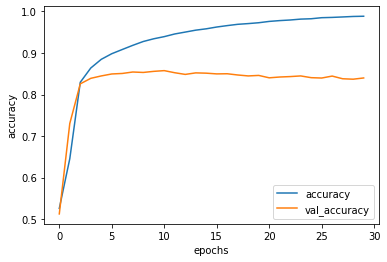

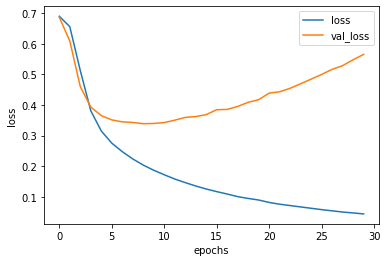

In [ ]:
# accuracy and loss chart

import matplotlib.pyplot as plt

def plot_graphs(h, s):
    plt.plot(h.history[s])
    plt.plot(h.history['val_'+s])
    plt.xlabel("epochs")
    plt.ylabel(s)
    plt.legend([s, 'val_'+s])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# testing with new data
sentence = ["Nation will be regret for breaking necular deal", 
            "Andrew Feinberg Insiders fear Trump will play dirty over conspiracy theories"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=125, padding="post", truncating="post")
print(model.predict(padded))


[[0.99984723]
 [0.06283492]]


### Data old version

In [ ]:
import json

data = []

with open("/content/drive/My Drive/TensorFlow/NLP/sarcasm_headline_dataset/Sarcasm_Headlines_Dataset.json") as f:
  for line in f:
    data.append(json.loads(line))



headlines = []
labels =[]
urls = []

for i in data:
  headlines.append(i["headline"])
  urls.append(i["article_link"])
  labels.append(i["is_sarcastic"])

split_size = int(len(data) * 0.1)

train_headlines = headlines[split_size:]
y_train = labels[split_size:]

test_headlines = headlines[:split_size]
y_test = labels[:split_size]

import numpy as np

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=15000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_headlines)
word_index = tokenizer.word_index

x_train_seq = tokenizer.texts_to_sequences(train_headlines)
x_train = pad_sequences(x_train_seq, maxlen=150, padding="pre", truncating="pre")

x_test_seq = tokenizer.texts_to_sequences(test_headlines)
x_test = pad_sequences(x_test_seq, maxlen=150, padding="pre", truncating="pre")

from tensorflow.keras import Sequential, layers, losses, optimizers

model = Sequential([
                    layers.Embedding(input_dim=15000, output_dim=18, input_length=150),
                    layers.GlobalAveragePooling1D(),

                    layers.Dense(18, activation="relu"),
                    layers.Dense(1, activation="sigmoid")
]) 

model.summary()

model.compile(optimizer=optimizers.Adam(lr=1e-3), 
              loss=losses.binary_crossentropy, metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=64, epochs=15, 
          verbose=2, validation_data=(x_test, y_test))


Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 150, 18)           270000    
_________________________________________________________________
global_average_pooling1d_33  (None, 18)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 18)                342       
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 19        
Total params: 270,361
Trainable params: 270,361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
376/376 - 1s - loss: 0.6822 - accuracy: 0.5618 - val_loss: 0.6729 - val_accuracy: 0.5547
Epoch 2/15
376/376 - 1s - loss: 0.5927 - accuracy: 0.6920 - val_loss: 0.5018 - val_accuracy: 0.7906
Epoch 3/15
376/376 - 1s - loss: 0.4011 - accu

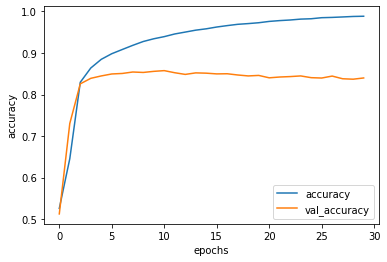

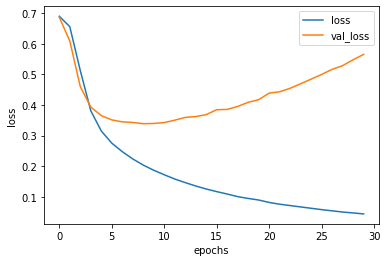

In [ ]:
import matplotlib.pyplot as plt

def graph_plot(h, s):
  plt.xlabel("epochs")
  plt.ylabel(s)
  plt.plot(h.history[s])
  plt.plot(h.history['val_'+s])
  plt.legend([s,'val_'+s])
  plt.show()

graph_plot(history, "accuracy")
graph_plot(history, 'loss')

In [ ]:
# testing with new data
sentence = ["French court jails drunk anaesthetist over death of British woman during C-section", 
            "France marks five years since November 13th terror attacks"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=125, padding="post", truncating="post")
print(model.predict(padded))

[[9.20547485e-01]
 [1.49455445e-05]]
